In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
import scipy.signal as signal

In [2]:
# A sample sine wave
def generate_sine_wave(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio_signal = np.sin(2 * np.pi * frequency * t)
    return t, audio_signal

In [3]:
# Pulse Width Modulation function
def pwm_modulate(audio_signal, sample_rate, pwm_frequency):
    t = np.arange(0, len(audio_signal)) / sample_rate
    carrier = signal.sawtooth(2 * np.pi * pwm_frequency * t, 0.5)
    pwm_signal = (audio_signal > carrier).astype(np.float32)
    return pwm_signal


In [4]:
# Using Low-pass filter for demodulation
def low_pass_filter(signal, sample_rate, cutoff_freq, order=5):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, signal)
    return y

In [5]:
sample_rate = 44100  
duration = 1.0  
frequency = 440
t, audio_signal = generate_sine_wave(frequency, duration, sample_rate)

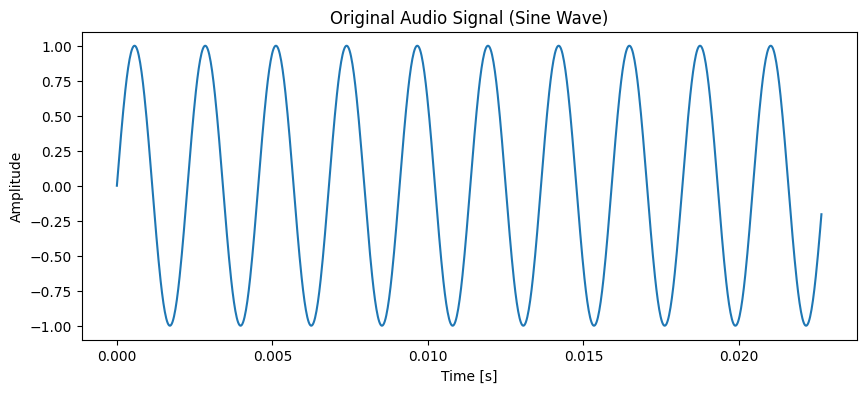

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], audio_signal[:1000])
plt.title("Original Audio Signal (Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [7]:
pwm_frequency = 20000  # PWM frequency (20 kHz)
pwm_signal = pwm_modulate(audio_signal, sample_rate, pwm_frequency)

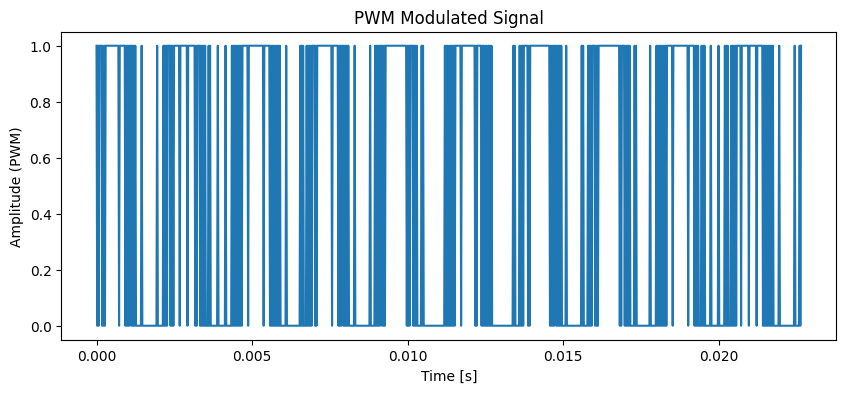

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], pwm_signal[:1000])
plt.title("PWM Modulated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude (PWM)")
plt.show()


In [9]:
cutoff_freq = 1000  # Cutoff frequency for low-pass filter
demodulated_signal = low_pass_filter(pwm_signal, sample_rate, cutoff_freq)

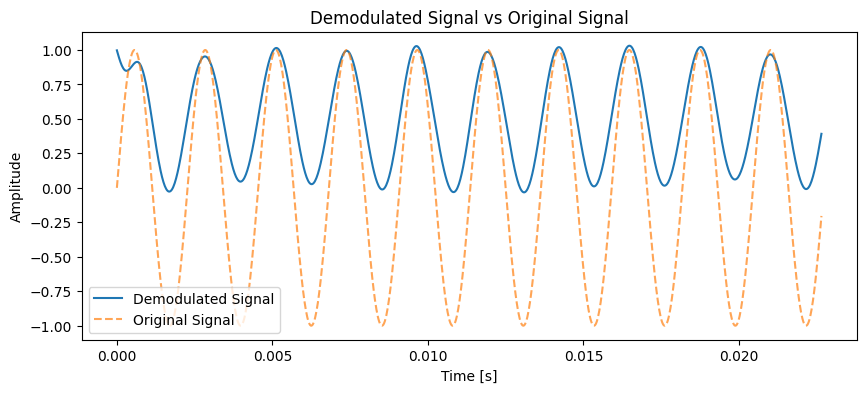

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], demodulated_signal[:1000], label="Demodulated Signal")
plt.plot(t[:1000], audio_signal[:1000], '--', label="Original Signal", alpha=0.7)
plt.title("Demodulated Signal vs Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()